In [53]:
# 417. Pacific Atlantic Water Flow
# https://leetcode.com/problems/pacific-atlantic-water-flow/

# There is an m x n rectangular island that borders both the Pacific Ocean and Atlantic Ocean. 
# The Pacific Ocean touches the island's left and top edges, and the Atlantic Ocean touches the island's right and bottom edges.
# The island is partitioned into a grid of square cells. 
# You are given an m x n integer matrix heights where heights[r][c] represents the height above sea level of the cell at coordinate (r, c).
# The island receives a lot of rain, and the rain water can flow to neighboring cells directly north, south, east, and west if the neighboring cell's height is less than or equal to the current cell's height. 
# Water can flow from any cell adjacent to an ocean into the ocean.
# Return a 2D list of grid coordinates result where result[i] = [ri, ci] denotes that rain water can flow from cell (ri, ci) to both the Pacific and Atlantic oceans.

# Input: heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
# Output: [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]

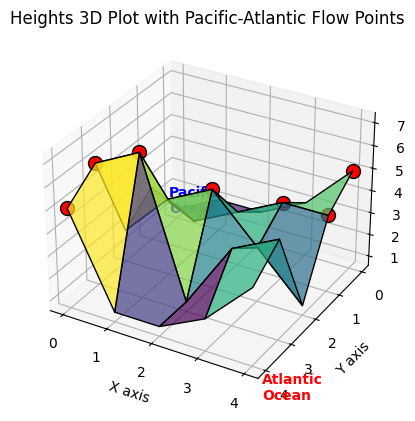

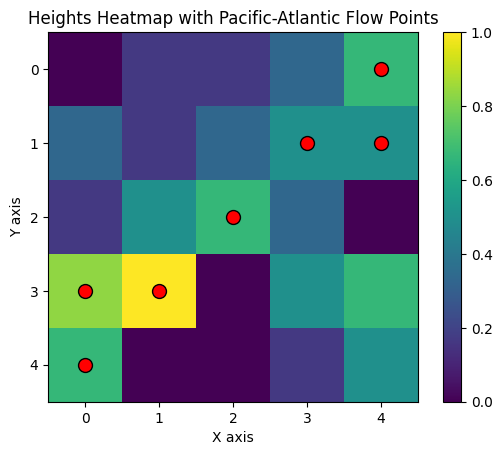

In [54]:
# show the heights as matrix
# [[1,2,2,3,5],
#  [3,2,3,4,4],
#  [2,4,5,3,1],
#  [6,7,1,4,5],
#  [5,1,1,2,4]]

# show the 3d plot of the heights
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Show the 3d plot of the heights and the result points on the same plot with Pacific Ocean and Atlantic Ocean labels that match the direction of the heatmap plot

heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
result = [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]
heights = np.array(heights)
x = np.arange(heights.shape[1])
y = np.arange(heights.shape[0])
x, y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.invert_yaxis()  # Flip y-axis so row 0 is at top (matches heatmap)
ax.plot_surface(x, y, heights, cmap='viridis', edgecolor='k', alpha=0.7)
for point in result:
    ax.scatter(point[1], point[0], heights[point[0], point[1]], color='r', s=100, edgecolors='k', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Height')
ax.set_title('Heights 3D Plot with Pacific-Atlantic Flow Points')
ax.text(-0.5, -0.5, 0, 'Pacific\nOcean', color='b', fontsize=10, weight='bold')
ax.text(heights.shape[1]-0.5, heights.shape[0]-0.5, 0, 'Atlantic\nOcean', color='r', fontsize=10, weight='bold')
# rotate the 3d plot to make pacific ocean on top left and atlantic ocean on bottom right
ax.view_init(elev=30, azim=-60)



plt.show()


# Plot the heights as heatmap with result points
import matplotlib.pyplot as plt
import numpy as np
heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
result = [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]
heights = np.array(heights)
plt.imshow(heights, cmap='viridis', interpolation='nearest')
for point in result:
    plt.scatter(point[1], point[0], color='r', s=100, edgecolor='k')    
plt.colorbar()
plt.title('Heights Heatmap with Pacific-Atlantic Flow Points')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [55]:
# Start from Pacific Ocean edges (top & left) - find all cells that can flow TO Pacific
# Start from Atlantic Ocean edges (bottom & right) - find all cells that can flow TO Atlantic
# Find cells that appear in BOTH sets

from typing import List
class Solution:
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        if not heights or not heights[0]:  # edge case
            return []  # no cells
        
        rows, cols = len(heights), len(heights[0]) # dimensions of the grid
        
        pacific_reachable = set() # cells that can reach Pacific Ocean
        atlantic_reachable = set() # cells that can reach Atlantic Ocean
        
        def dfs(r, c, reachable): # depth-first search to find all reachable cells
            reachable.add((r, c)) # mark cell as reachable
            directions = [(1, 0), (-1, 0), (0, 1), (0, -1)] # down, up, right, left
            for dr, dc in directions: # explore all 4 directions
                nr, nc = r + dr, c + dc # new row and column
                if (0 <= nr < rows and 0 <= nc < cols and # within bounds
                    (nr, nc) not in reachable and # not already visited
                    heights[nr][nc] >= heights[r][c]): # can flow to higher or equal height
                    dfs(nr, nc, reachable) # continue DFS
        
        # Start DFS from Pacific Ocean edges
        for r in range(rows): # left and right edges
            dfs(r, 0, pacific_reachable)  # Left edge
            dfs(r, cols - 1, atlantic_reachable)  # Right edge
        for c in range(cols): # top and bottom edges
            dfs(0, c, pacific_reachable)  # Top edge
            dfs(rows - 1, c, atlantic_reachable)  # Bottom edge
        
        # Find cells that can reach both oceans
        result = list(pacific_reachable & atlantic_reachable) # intersection of both sets
        return [list(cell) for cell in result] # convert tuples to lists for output



In [56]:
# Example usage
solution = Solution()
heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
print(solution.pacificAtlantic(heights))  # Output: [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]

[[4, 0], [0, 4], [3, 1], [1, 4], [3, 0], [2, 2], [1, 3]]
